<a href="https://colab.research.google.com/github/SierraWJ/AIBasic_Instruct/blob/main/AIBasic_Chapter2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 수학과 함께하는 AI 기초
## Chapter 2_3 : 소리 데이터 처리하기

막상 sounddevice 패키지를 설치해봐도 어찌 Colab에서 처리할 방법이 없어서 이 부분은 생략.  
어차피 소리 출력하는거라

In [ ]:
pip install sounddevice

### 소리 데이터 처리 및 시각화

sampling rate:  22050
time :  0.7813605442176871
vData :  [  2899   3912   4583   4520   3852   2744   1496    725    890   1968
   3470   4616   4867   4266   3267   2566   2671   3451   4471   5311
   5480   4789   3642   2628   2172   2296   2552   2587   2365   1788
    812   -417  -1848  -3250  -4074  -4209  -4236  -4794  -6158  -8135
 -10150 -11595 -12089 -11715 -11148 -11117 -11836 -13066 -14205 -14524
 -13937 -13173 -12830 -12816 -12661 -11620  -8703  -3632   2073   5600
   5077   1793   -231   2004   7297  11561  11937   9086   5769   3724
   2460   1004   -461  -1253  -1480  -2055  -3581  -5579  -7018  -7343
  -6614  -4950  -2371    628   2774   2899   1316     -9    945   4290
   8101  10304  10278   8894   7496   6716   6502   6936   7903   8664]


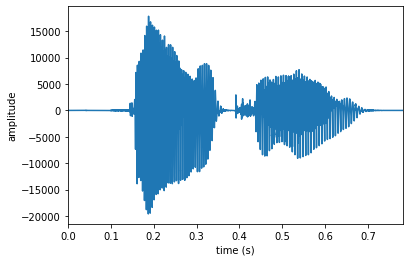

In [ ]:
# 소리 데이터에 필요한 외부 모듈 설정하기

# 소리 파일을 다루기 위한 모듈
import numpy as np                                    # 행렬 및 벡터 데이터 관리를 위한 numpy 모듈
import matplotlib.pyplot as plt                       # 음성 데이터의 그래프 표현을 위한 모듈
                             
import scipy.io.wavfile 
#import sounddevice as sd                              # 소리 데이터를 실제 스피커로 출력하기 위한 사운드 장치 모듈


# 작업 폴더에 저장된 ‘thank_you.wav’ 파일 읽기
v_samplerate, v_data = scipy.io.wavfile.read("thank_you.wav")
times = np.arange(len(v_data))/float(v_samplerate)     # x축 시간 정보를 구하기

print('sampling rate: ', v_samplerate)                 # wav 파일의 샘플링 주기를 출력
print('time : ', times[-1])                            # 소리의 재생 시간을 출력(times[ ]의 마지막 성분의 값)
print('vData : ', v_data[5000:5100])                   # 5000번째 샘플링 데이터부터 100개를 출력
#sd.play(v_data, v_samplerate)                          # 읽어 들인 wav 파일을 사운드 장치로 출력

# wav 형식의 소리 데이터를 그래프로 출력(X축: 소요 시간, Y축: 소리의 높낮이 진폭값)
plt.plot(times, v_data)
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()



### 소리 데이터 생성하기

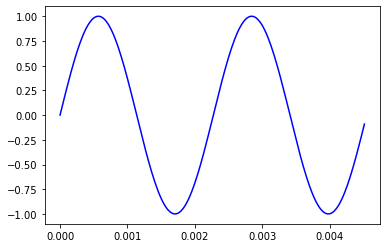

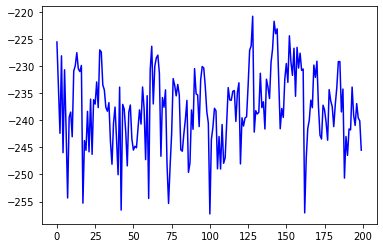

In [1]:
# 소리 데이터에 필요한 외부 모듈과 환경 변수 설정하기

import numpy as np                             # 행렬 및 벡터 데이터 관리를 위한 numpy 모듈
import matplotlib.pyplot as plt                # 소리 데이터의 그래프 표현을 위한 모듈
from scipy.io.wavfile import write             # wav 형식으로 소리 데이터를 저장하기 위한 모듈
import os                                      # wav 파일을 시스템 명령어로 재생하기 위한 모듈

# sampling rate
Fs = 44100.0                                   # 정보 샘플링 주기, 1초에 44100개의 샘플링, 단위는 Hz(주파수)            

# 1초 데이터 생성을 위한 환경 변수 설정
tlen = 1                                       # 1초
Ts = 1/Fs                                      # 샘플링 사이의 간격(시간)
t = np.arange(0, tlen, Ts)                     # 소리 데이터를 생성할 시간 성분으로 구성된 배열로
                                               # [0, 1] 사이를 TimeStamp의 간격으로 분할하여
                                               # Fs 개의 데이터를 담을 수 있는 배열 t를 생성
                                               
# 시그널 생성하기
sin_freq = 440                                 # sin 곡선의 주기
src = 2*np.pi*sin_freq*t                       # t 배열의 각 성분값에 sin 주기를 라디안 단위로 변환한 src 배열을 준비
signal = np.sin(src)                           # timestamp를 각으로 변환한 src 배열에 맞게 sin 데이터를 변환

  #### 200개의 데이터를 가시화한 그래프를 보여줌.

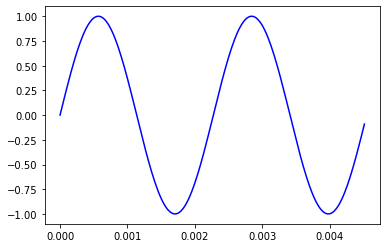

In [2]:
# 데이터의 가시화: 생성한 시그널 데이터를 그래프로 표현
x_range = 200                                  # 시작부터 200개의 데이터만 보여 주기 위한 범위값
plt.plot(t[0:x_range], signal[0:x_range], color = 'blue')    # x축의 timstamp에 sin 함수로 생성한 데이터를 y축에 좌푯값으로 그래프를 그림

plt.show()  

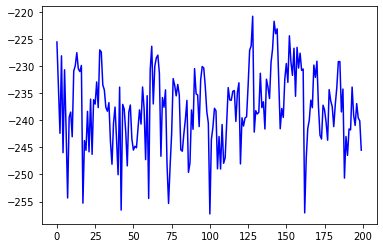

In [3]:
# 데이터의 가시화: 시그널 데이터를 푸리에 변환하여 주파수 영역에서 가시화함.
freq = np.fft.fftfreq(len(t), Ts)              # 주파수 영역에서의 샘플링 구간값의 배열
signal_f = np.fft.fft(signal)                  # sin 함수값으로부터 주파수 영역에서의 정보를 나타내기
                                               # 위한 푸리에 변환 값을 signal_f 배열로 저장
plt.plot(freq[0:x_range], 20*np.log10(np.abs(signal_f[0:x_range])), color='blue')
                                               # x축의 주파수 성분에 맞게 그래프를 그림.
plt.show()                                     # 푸리에 변환된 200개 데이터를 그래프로 출력

#### 생성한 소리 데이터를 wav 형식의 파일로 저장하기

In [4]:
# sin 함수로 생성한 음성 데이터를 wav 형식의 파일로 저장
scaled = np.int16(signal/np.max(np.abs(signal)) * 32767)
write('snd_signal.wav', 44100, scaled)

#### 잡음 데이터 예제

In [6]:
import numpy as np                             # 행렬 및 벡터 데이터 관리를 위한 numpy 모듈
import matplotlib.pyplot as plt                # 소리 데이터의 그래프 표현을 위한 모듈
from scipy.io.wavfile import write             # wav 형식으로 소리 데이터를 저장하기 위한 모듈
import os                                      # wav 파일을 시스템 명령어로 재생하기 위한 모듈

# sampling rate
Fs = 44100.0                                   # 정보 샘플링 주기, 1초에 44100개의 샘플링, 단위는 Hz(주파수)            

# 1초 데이터 생성을 위한 환경 변수 설정
tlen = 1                                       # 1초로 초기화
Ts = 1/Fs                                      # 샘플링 사이의 간격(시간) 계산
t = np.arange(0, tlen, Ts)                     # 소리 데이터를 생성할 시간 성분으로 구성된 배열로
                                               # [0, 1] 사이를 TimeStamp의 간격으로 분할하여
                                               # Fs 개의 데이터를 담을 수 있는 배열 t를 생성
                                               
# 시그널 생성하기
sin_freq = 440                                 # sin 곡선의 주기
src = 2*np.pi*sin_freq*t                       # t 배열의 각 성분값에 sin 주기를 라디안 단위로 변환한 src 배열을 준비
signal = np.sin(src)                           # timestamp를 각으로 변환한 src 배열에 맞게 sin 데이터를 변환


# 데이터의 가시화: 생성한 시그널 데이터를 그래프로 표현
x_range = 200                                  # 시작부터 200개의 데이터만 보여 주기 위한 범위값

In [7]:
noise = np.random.uniform(-1, 1, len(t))       # 균등분포의 난수로 구성된 잡음 데이터 생성
scaled_noise = noise * 0.3                     # noise 데이터의 볼륨을 30% 낮춤.

# 잡음 데이터와 볼륨을 낮춘 데이터 출력
print("noise[0:20] = ")
print(noise[0:20])
print("scaled_noise[0:20] = ")
print(scaled_noise[0:20])

noise[0:20] = 
[ 0.7769644   0.026247   -0.8238643   0.38350754 -0.8703618  -0.59057719
  0.52615445  0.18464094 -0.83910266  0.67659093  0.24802859  0.01512008
 -0.71691106 -0.76585223 -0.88665877  0.01592832  0.81028345  0.36800868
 -0.66753389 -0.65289211]
scaled_noise[0:20] = 
[ 0.23308932  0.0078741  -0.24715929  0.11505226 -0.26110854 -0.17717316
  0.15784633  0.05539228 -0.2517308   0.20297728  0.07440858  0.00453603
 -0.21507332 -0.22975567 -0.26599763  0.0047785   0.24308503  0.1104026
 -0.20026017 -0.19586763]


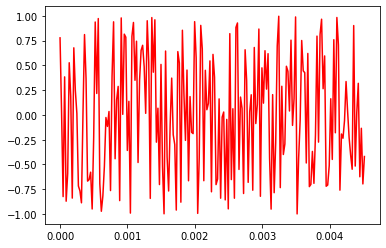

In [8]:
# 데이터의 가시화: [-1, 1] 구간에서 생성한 잡음 데이터를 그래프로 표현
plt.plot(t[0:x_range], noise[0:x_range], color = 'red')
plt.show( )

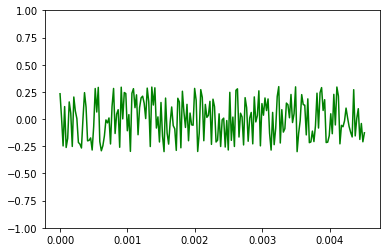

In [9]:
# 데이터의 가시화: 원 데이터의 볼륨을 낮춘 scaled_noise 데이터를 그래프로 표현
plt.plot(t[0:x_range], scaled_noise[0:x_range], color = 'green')
plt.ylim(-1, 1) # Y축의 데이터 구간을 –1과 1로 지정
plt.show( )

In [11]:
# 생성한  잡음 데이터를 wav 형식의 파일로 저장
scaled = np.int16(noise/np.max(np.abs(noise)) * 32767)
write('noise_signal.wav', 44100, scaled)

### 생활 속의 소리 합성하기

In [12]:
# 생활 속의 소리 합성하기

import numpy as np                                         # 행렬 및 벡터 데이터 관리를 위한 numpy 모듈
import matplotlib.pyplot as plt                            # 소리 데이터의 그래프 표현을 위한 모듈 

import scipy.io as sio                                     # wav 형식으로 소리 데이터를 저장하기 위한 모듈                         
from scipy.io.wavfile import write                         # wav 파일을 시스템 명령어로 재생하기 위한 모듈 
import os

# sampling rate
Fs = 44100.0                                   # 정보 샘플링 주기, 1초에 44100개의 샘플링, 단위는 Hz(주파수)            

# 1초 데이터 생성을 위한 환경 변수 설정
tlen = 1                                       # 1초
Ts = 1/Fs                                      # 샘플링 사이의 간격(시간)
t = np.arange(0, tlen, Ts)                     # 소리 데이터를 생성할 시간 성분으로 구성된 배열로
                                               # [0, 1] 사이를 TimeStamp의 간격으로 분할하여
                                               # Fs 개의 데이터를 담을 수 있는 배열 t를 생성
                                               
# 시그널 생성하기
sin_freq = 440                                 # sin 곡선의 주기
src = 2*np.pi*sin_freq*t                       # t 배열의 각 성분값에 sin 주기를 라디안 단위로 변환한 src 배열을 준비
signal = np.sin(src)                           # timestamp를 각으로 변환한 src 배열에 맞게 sin 데이터를 변환


# 데이터의 가시화: 생성한 시그널 데이터를 그래프로 표현
x_range = 200                                  # 시작부터 200개의 데이터만 보여 주기 위한 범위값
noise = np.random.uniform(-1, 1, len(t))       # 균등분포의 난수로 구성된 잡음 데이터 생성


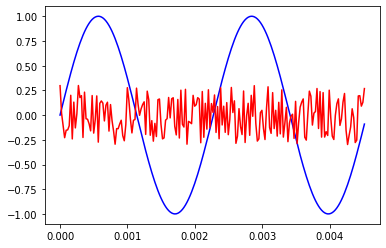

In [13]:
signal_n = signal + noise

# signal + noise로 두 소리 데이터를 산술적으로 더함.
scaled_noise = noise * 0.3                     # 소리 크기를 30% 줄이기
signal_n = signal + scaled_noise
# save as wav file
scaled = np.int16(signal_n/np.max(np.abs(signal_n)) * 32767)
write('snd_noise.wav', 44100, scaled)

#show the raw signals
plt.plot(t[0:x_range], signal[0:x_range], color = 'blue')
plt.plot(t[0:x_range], scaled_noise[0:x_range], color = 'red')
plt.show()

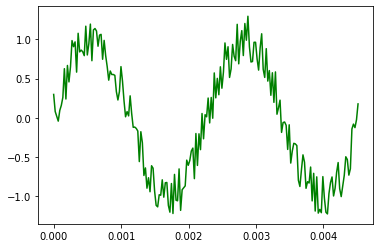

In [14]:
plt.plot(t[0:x_range], signal_n[0:x_range], color = 'green')
plt.show()

In [15]:

import os                   # wav 파일을 시스템 명령어로 재생하기 위한 모듈 

os.system("start snd_signal.wav")
os.system("start noise_signal.wav")
os.system("start snd_noise.wav")
#Colab환경에서는 재생이 힘듬

32512

### 나만의 소리 파일의 데이터와 샘플링 주기 확인하기

In [ ]:
# 나만의 소리 파일의 데이터와 샘플링 주기 확인하기

import numpy as np                                         # 행렬 및 벡터 데이터 관리를 위한 numpy 모듈
import scipy.io as sio                                   
from scipy.io.wavfile import write                         # wav 파일을 시스템 명령어로 재생하기 위한 모듈 
import os

# sampling rate
v_samplerate, v_data = sio.wavfile.read("thank_you.wav")
b_samplerate, b_data = sio.wavfile.read("Invisible_Beauty.wav")

v_times = np.arange(len(v_data))/float(v_samplerate)
b_times = np.arange(len(b_data))/float(b_samplerate)

print('sampling rate: ', v_samplerate, b_samplerate)
print('time : ', v_times[-1], b_times[-1])
print('len : ', len(v_data), len(b_data))

print(v_data.shape)
print(b_data.shape)



sampling rate:  22050 44100
time :  0.7813605442176871 187.1887074829932
len :  17230 8255023
(17230,)
(8255023, 2)


### 나만의 소리 파일의 데이터와 샘플링 주기를 그래프로 출력하기

In [16]:
# 나만의 소리 파일의 데이터와 샘플링 주기를 그래프로 출력하기

import numpy as np                          # 행렬 및 벡터 데이터 관리를 위한 numpy 모듈
import scipy.io as sio                      # wav 형식으로 소리 데이터를 저장하기 위한 모듈                         
from scipy.io.wavfile import write          # wav 파일을 시스템 명령어로 재생하기 위한 모듈 
import os

# sampling rate
v_samplerate, v_data = sio.wavfile.read("thank_you.wav")
b_samplerate, b_data = sio.wavfile.read("Invisible_Beauty.wav")

v_times = np.arange(len(v_data))/float(v_samplerate)
b_times = np.arange(len(b_data))/float(b_samplerate)

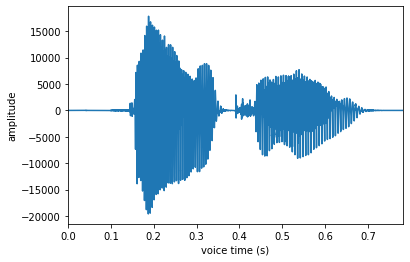

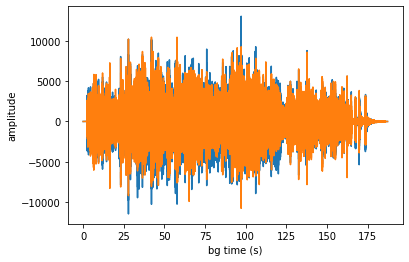

In [17]:
import matplotlib.pyplot as plt                            # 소리 데이터의 그래프 표현을 위한 모듈 

plt.plot(v_times, v_data)
plt.xlim(v_times[0], v_times[-1])
plt.xlabel('voice time (s)')
plt.ylabel('amplitude')
plt.show()

plt.plot(b_times, b_data)
plt.xlabel('bg time (s)')
plt.ylabel('amplitude')
plt.show()

### 나만의 소리 파일의 샘플링 주기와 채널 타입 바꾸기

In [18]:
# 나만의 소리 파일의 샘플링 주기와 채널 타입 바꾸기

import numpy as np                                         # 행렬 및 벡터 데이터 관리를 위한 numpy 모듈
import matplotlib.pyplot as plt                            # 소리 데이터의 그래프 표현을 위한 모듈 
import scipy.io as sio            
from scipy.io.wavfile import write                         # wav 파일을 시스템 명령어로 재생하기 위한 모듈 
import os

# sampling rate
v_samplerate, v_data = sio.wavfile.read('thank_you.wav')
b_samplerate, b_data = sio.wavfile.read("Invisible_Beauty.wav")

v_times = np.arange(len(v_data))/float(v_samplerate)
b_times = np.arange(len(b_data))/float(b_samplerate)

In [19]:
# stereo channel -> mono channel
if (len(v_data.shape) > 1) : 
   v_data = np.array(v_data[:,0])
if (len(b_data.shape) > 1) : 
   b_data = np.array(b_data[:,0])

# 샘플링 주기 낮추기
if (v_samplerate > b_samplerate) :
   diffRate = v_samplerate / b_samplerate
   v_data = np.array(v_data[0:len(v_data):diffRate])
   sr = b_samplerate
elif (v_samplerate < b_samplerate) : 
   diffRate = int(b_samplerate / v_samplerate)
   b_data = np.array(b_data[0:len(b_data):diffRate])
   sr = v_samplerate
else :
   sr = b_samplerate

# 10초 지점의 배경 음악과 음성 데이터 합성하기
mix_data = v_data + b_data[sr*10:len(v_data)+sr*10]

# 합성한 데이터를 배경 음악 10초 위치에 넣기
b_data[sr*10:len(v_data)+sr*10] = mix_data

# 합성한 파일을 wav 파일로 저장하기
scaled = np.int16(b_data/np.max(np.abs(b_data)) * 32767)
write('music_card.wav', sr, scaled)
os.system("start music_card.wav")

32512